In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import h5py

In [2]:
def read_many_hdf5(num_images):
    """ Reads image from HDF5.
        Parameters:
        ---------------
        num_images   number of images to read

        Returns:
        ----------
        images      images array, (N, 32, 32, 3) to be stored
        labels      associated meta data, int label (N, 1)
    """
    images, labels = [], []

    # Open the HDF5 file
    file = h5py.File(f"{num_images}_many.h5", "r+")

    images = np.array(file["/images"])#.astype("uint8")
    labels = np.array(file["/meta"])#.astype("uint8")

    return images, labels

In [3]:
X,y=read_many_hdf5(1646)

In [4]:
#X = X/255


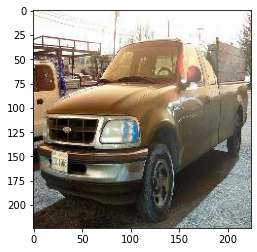

In [5]:
plt.imshow(X[568])

In [6]:
#X[568]

In [7]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu',kernel_initializer='glorot_normal',kernel_regularizer='l2'))
#model.add(layers.Dense(512, activation='relu',kernel_initializer='he_normal',kernel_regularizer='l2'))
#model.add(layers.Dense(512, activation='relu',kernel_initializer='he_normal',kernel_regularizer='l2'))
model.add(layers.Dense(1, activation='sigmoid',kernel_initializer='he_normal'))

In [9]:
conv_base.trainable = False

In [10]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [11]:
#X

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 40,406,849
Trainable params: 25,692,161
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
datagen = ImageDataGenerator( rescale=1./255, 
        rotation_range=20,  
        zoom_range = 0.15,  
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False,
        shear_range=0.05
                        )
#datagen.fit(X)

In [16]:
model.fit(datagen.flow(X,y,shuffle=False),epochs=50)

Epoch 1/50
52/52 [==============================] - 40s 765ms/step - loss: 8.6667 - accuracy: 0.6039
Epoch 2/50
52/52 [==============================] - 37s 709ms/step - loss: 1.8426 - accuracy: 0.7418
Epoch 3/50
52/52 [==============================] - 37s 711ms/step - loss: 0.9910 - accuracy: 0.8086
Epoch 4/50
52/52 [==============================] - 37s 715ms/step - loss: 0.8233 - accuracy: 0.7831
Epoch 5/50
52/52 [==============================] - 37s 719ms/step - loss: 0.6670 - accuracy: 0.8062
Epoch 6/50
52/52 [==============================] - 36s 698ms/step - loss: 0.6548 - accuracy: 0.7910
Epoch 7/50
52/52 [==============================] - 36s 699ms/step - loss: 0.5056 - accuracy: 0.8402
Epoch 8/50
52/52 [==============================] - 37s 709ms/step - loss: 0.5716 - accuracy: 0.7922
Epoch 9/50
52/52 [==============================] - 37s 703ms/step - loss: 0.5033 - accuracy: 0.8366
Epoch 10/50
52/52 [==============================] - 37s 713ms/step - loss: 0.6183 - accura

In [ ]:
#model.save('full_model.h5')

In [17]:
def read_many_test_hdf5(num_images):
    """ Reads image from HDF5.
        Parameters:
        ---------------
        num_images   number of images to read

        Returns:
        ----------
        images      images array, (N, 32, 32, 3) to be stored
        labels      associated meta data, int label (N, 1)
    """
    images, labels = [], []

    # Open the HDF5 file
    file = h5py.File(f"{num_images}_test_many.h5", "r+")

    images = np.array(file["/images"])#.astype("uint8")
    #labels = np.array(file["/meta"])#.astype("uint8")

    return images

In [18]:
X_Test = read_many_test_hdf5(706)

In [19]:
y_predicted = model.predict_classes(X_Test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
#y_predicted

In [21]:
sub_df = pd.read_csv('sample_submission_yxjOnvz.csv')

In [22]:
sub_df['emergency_or_not'] = pd.Series(y_predicted.reshape(-1))

In [23]:
sub_df.to_csv('sub.csv',index=False)